<a href="https://colab.research.google.com/github/widegather1216/2024-1-my-BDA/blob/main/inclass/06w_0408_A_ch07_missingvalue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import site
site.getsitepackages()

['/usr/local/lib/python3.10/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/lib/python3.10/dist-packages']

In [6]:
import sys
import pandas as pd
import numpy as np
import seaborn as sns

print(sys.version)
print(np.__version__)
print(pd.__version__)
print(sns.__version__)

3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
1.25.2
2.0.3
0.13.1


In [2]:
!pip install koreanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 18.2 MB/s eta 0:00:00


In [3]:
# 해상도 선명하게
%config InlineBackend.figure_format = 'retina'

In [7]:
# 데이터 프레임의 소수점 이하 n자리 출력 설정
pd.set_option('display.precision', 2)

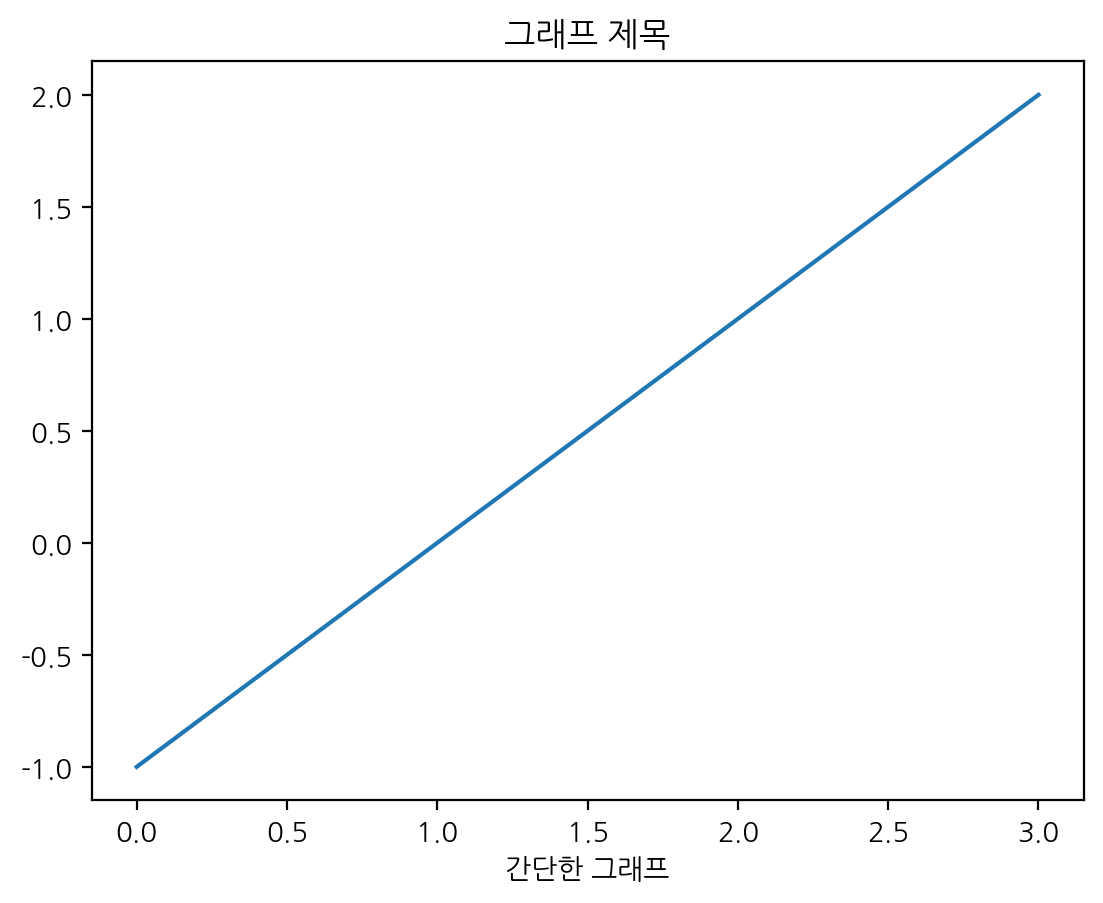

In [8]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

plt.plot([-1, 0, 1, 2])
plt.title('그래프 제목')
plt.xlabel('간단한 그래프')
plt.show()

In [9]:
!git clone https://github.com/ai7dnn/data.git

Cloning into 'data'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 24 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (24/24), 4.00 MiB | 5.66 MiB/s, done.


In [10]:
import pandas as pd

exam = pd.read_csv('data/exam.csv')
exam.head()

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65


# 07 데이터 정제 - 빠진 데이터, 이상한 데이터 제거하기

## 07-1 빠진 데이터를 찾아라! - 결측치 정제하기

### 결측치 찾기

In [13]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'sex' : ["M", "F", np.nan, "M", "F"],
                'score' : [5, 4, 3, 4, None]})
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [14]:
df['score'] + 1

0    6.0
1    5.0
2    4.0
3    5.0
4    NaN
Name: score, dtype: float64

### 결측치 확인하기 pd.isna()

In [16]:
pd.isna(df)

,sex,score
0,False,False
1,False,False
2,True,False
3,False,False
4,False,True


In [15]:
df.isna()

,sex,score
0,False,False
1,False,False
2,True,False
3,False,False
4,False,True


In [17]:
pd.isnull(df) #결측치 확인

,sex,score
0,False,False
1,False,False
2,True,False
3,False,False
4,False,True


In [18]:
df.isnull()

,sex,score
0,False,False
1,False,False
2,True,False
3,False,False
4,False,True


In [19]:
df.isna().sum()

sex      1
score    1
dtype: int64

In [20]:
df.isna().sum(axis=1)

0    0
1    0
2    1
3    0
4    1
dtype: int64

In [21]:
pd.Series([True, False, True]).sum()

2

In [22]:
df.isna().any()

sex      True
score    True
dtype: bool

In [23]:
df.isna().all()

sex      False
score    False
dtype: bool

In [24]:
df.isna().any(axis=1)

0    False
1    False
2     True
3    False
4     True
dtype: bool

In [28]:
df.isna().all(axis=1)

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [29]:
df.notnull().all()

sex      False
score    False
dtype: bool

In [30]:
df.notnull().all(axis=1)

0     True
1     True
2    False
3     True
4    False
dtype: bool

In [32]:
# 적어도 하나 이상 NaN인 행을 추출, 시험 예상
df[df.isna().any(axis=1)]

,sex,score
2,NaN,3.0
4,F,NaN


In [35]:
df.isna().any()

sex      True
score    True
dtype: bool

In [33]:
# NaN이 하나도 없는 행을 추출, 시험 예상
df[~df.isna().any(axis=1)]

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


In [36]:
df[ [True]*5 ]

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [37]:
df[ [True, True, False, False, True] ]

,sex,score
0,M,5.0
1,F,4.0
4,F,NaN


## 결측값 시각화

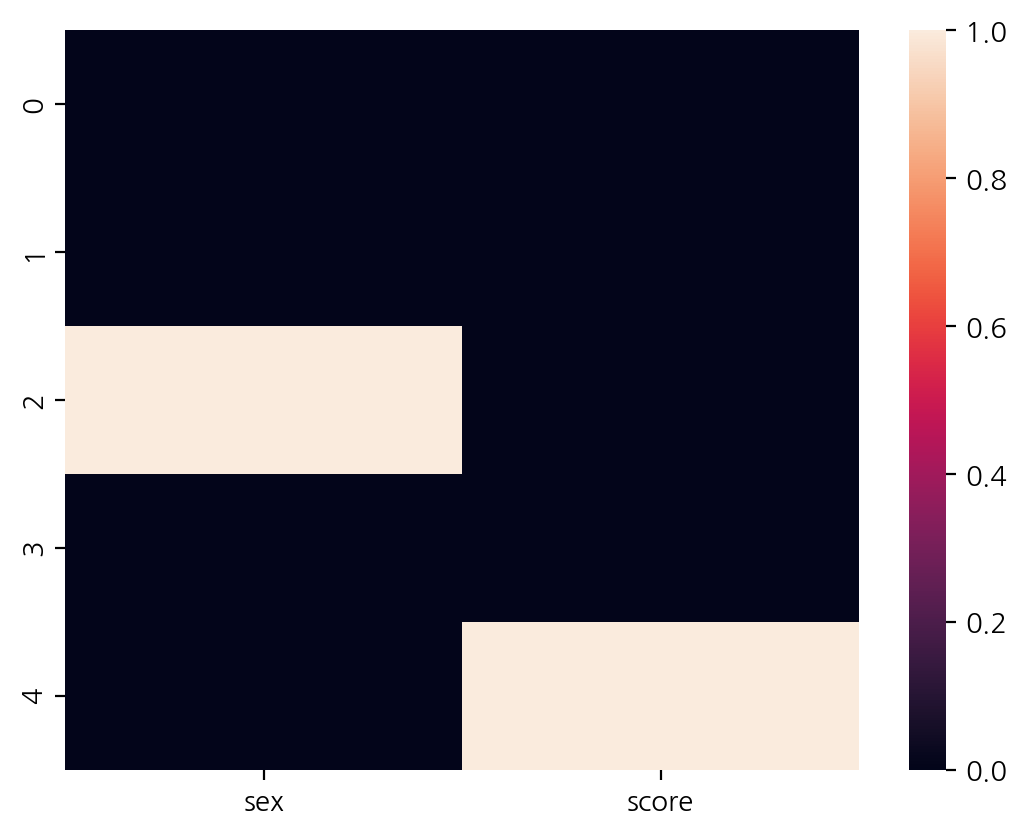

In [38]:
import seaborn as sns
sns.heatmap(df.isnull());

<Axes: >

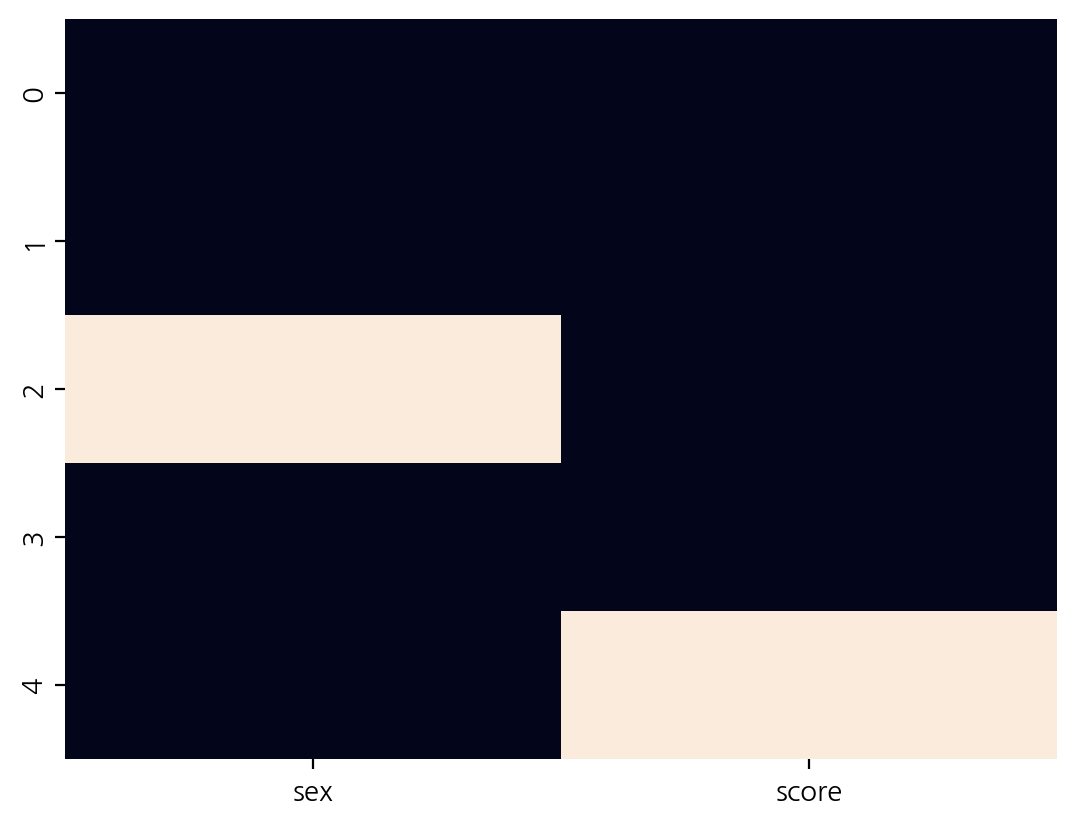

In [39]:
sns.heatmap(df.isnull(), cbar = False)

<Axes: >

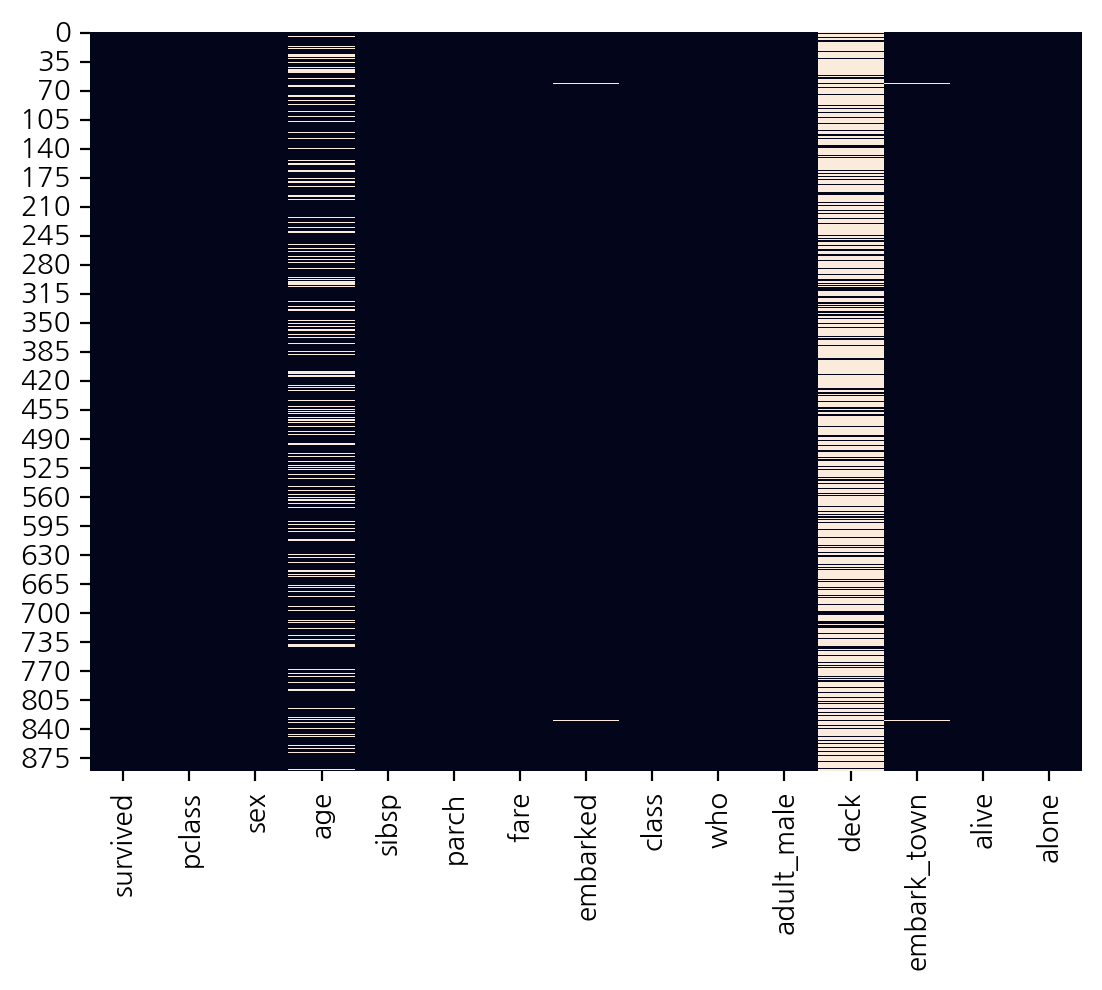

In [40]:
tdf = sns.load_dataset('titanic')
sns.heatmap(tdf.isnull(), cbar=False)

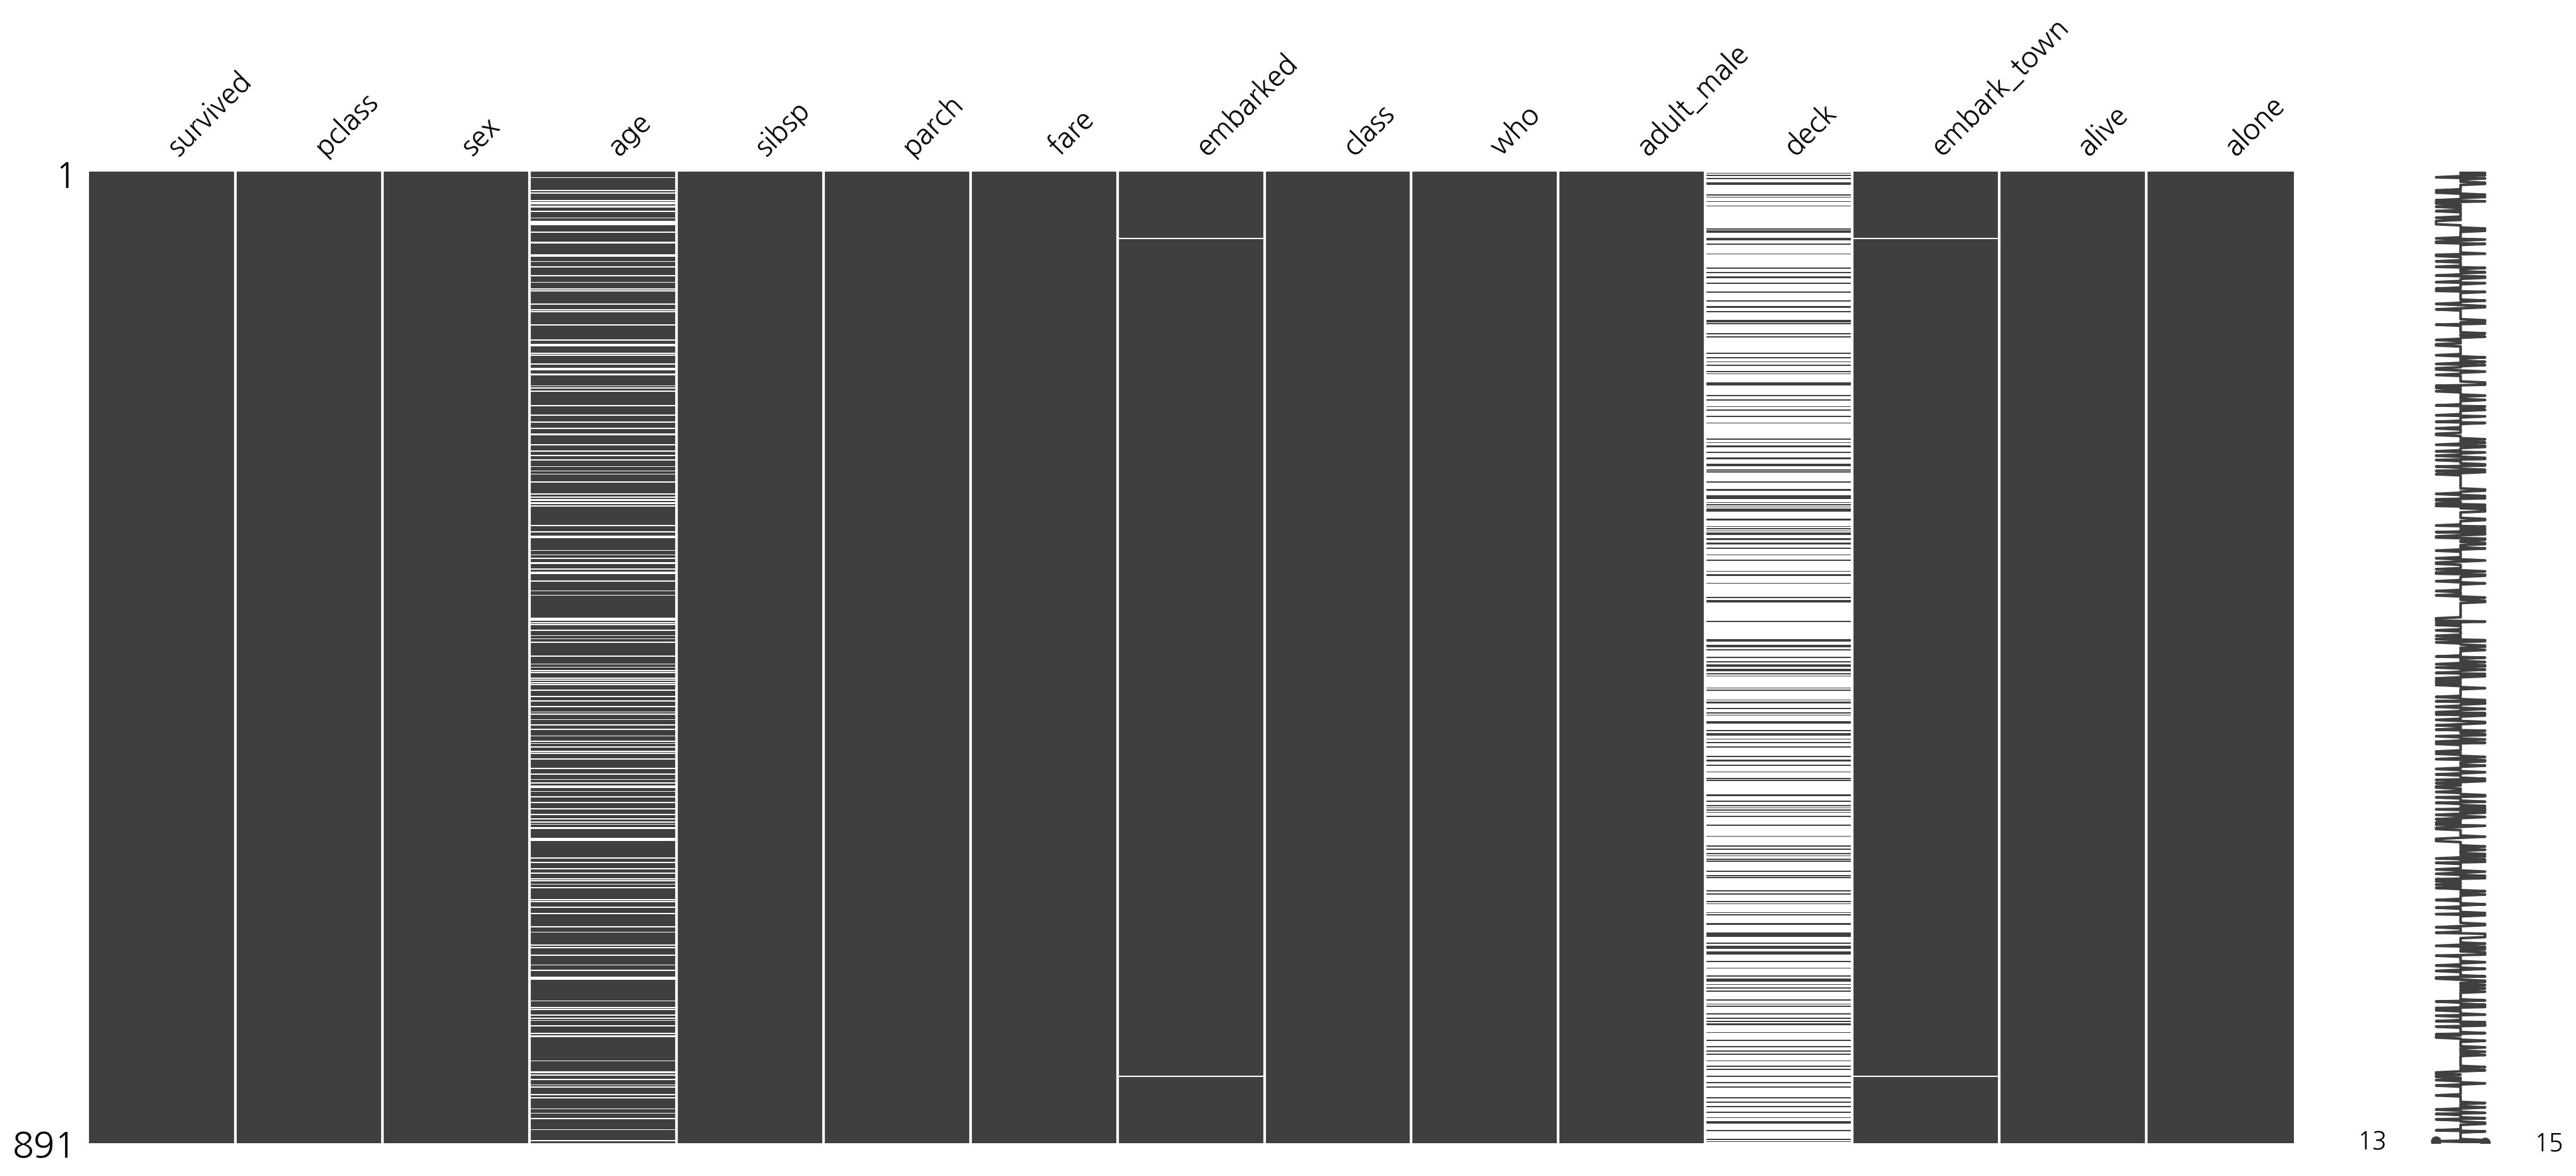

In [41]:
import missingno as msno
msno.matrix(tdf);

In [42]:
# 열이 모두 NaN인 행 추출
tdf[ tdf.embarked.isna() ]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True


In [44]:
tdf[(tdf.age.isna()) & (tdf.deck.isna())]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
5,0,3,male,NaN,0,0,8.46,Q,Third,man,True,NaN,Queenstown,no,True
17,1,2,male,NaN,0,0,13.00,S,Second,man,True,NaN,Southampton,yes,True
19,1,3,female,NaN,0,0,7.22,C,Third,woman,False,NaN,Cherbourg,yes,True
26,0,3,male,NaN,0,0,7.22,C,Third,man,True,NaN,Cherbourg,no,True
28,1,3,female,NaN,0,0,7.88,Q,Third,woman,False,NaN,Queenstown,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.23,C,Third,man,True,NaN,Cherbourg,no,True
863,0,3,female,NaN,8,2,69.55,S,Third,woman,False,NaN,Southampton,no,False
868,0,3,male,NaN,0,0,9.50,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,NaN,0,0,7.90,S,Third,man,True,NaN,Southampton,no,True


In [45]:
# 3. 현재 열이 모두 NaN인 행 추출
tdf[(tdf.age.isna()) & (tdf.deck.isna()) & (tdf.embark_town.isna()) ]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone


In [46]:
 # 최소한 1개의 NaN에 있는 행 추출
 tdf[tdf.isna( ).any(axis=1)]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.25,S,Third,man,True,NaN,Southampton,no,False
2,1,3,female,26.0,0,0,7.92,S,Third,woman,False,NaN,Southampton,yes,True
4,0,3,male,35.0,0,0,8.05,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.46,Q,Third,man,True,NaN,Queenstown,no,True
7,0,3,male,2.0,3,1,21.07,S,Third,child,False,NaN,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,3,male,25.0,0,0,7.05,S,Third,man,True,NaN,Southampton,no,True
885,0,3,female,39.0,0,5,29.12,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False


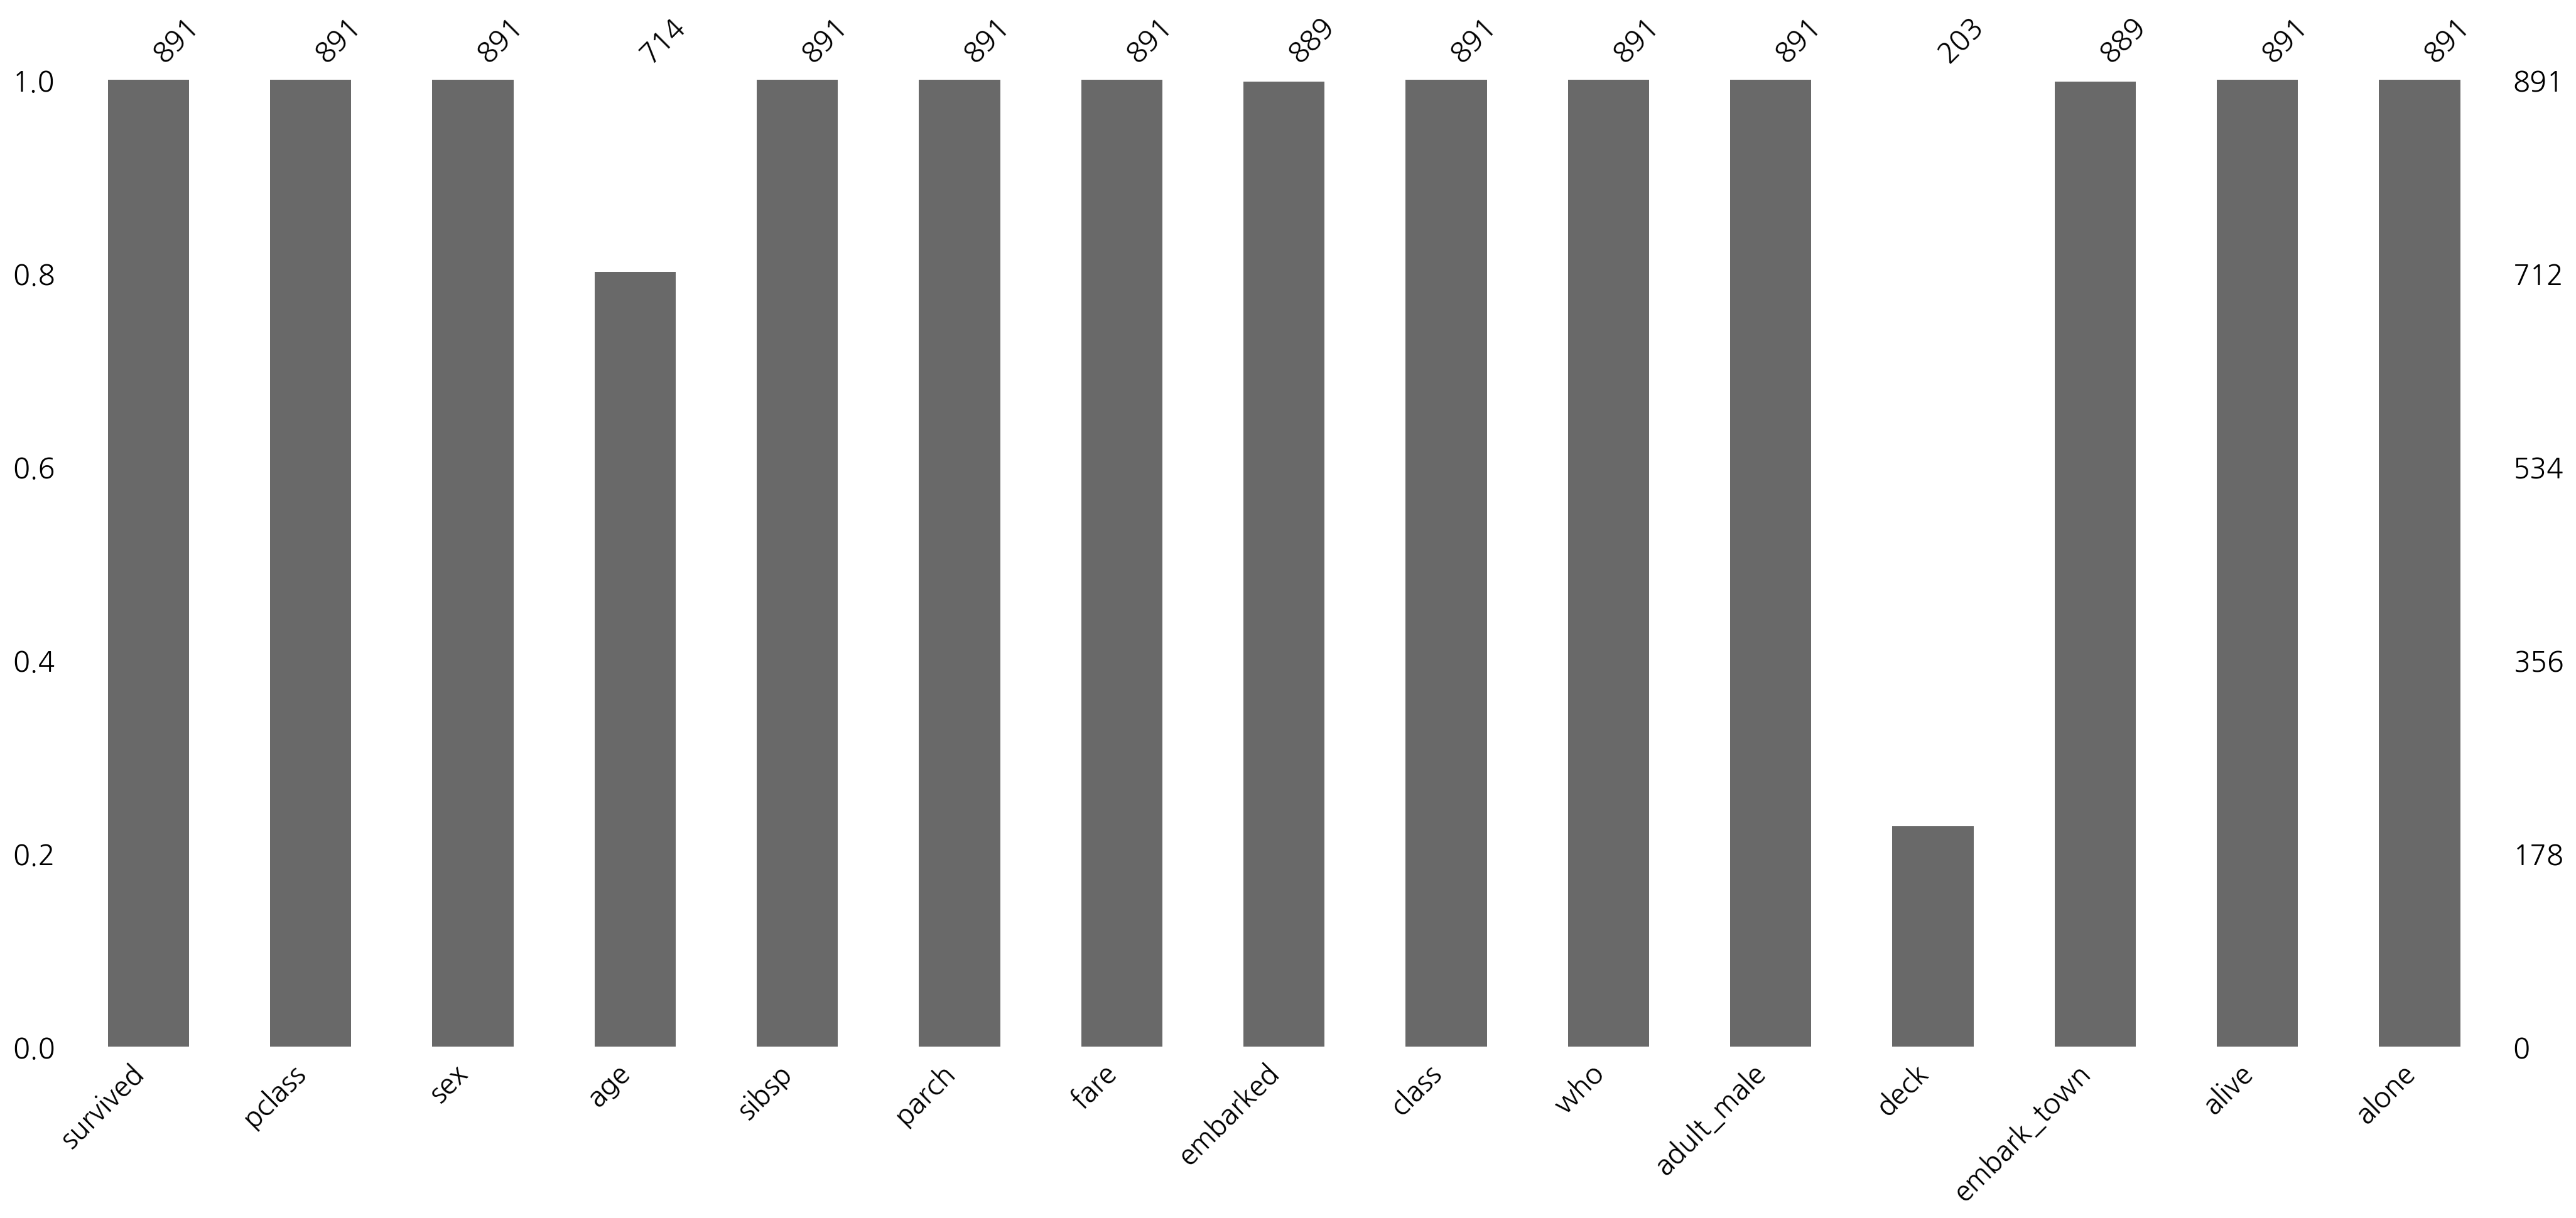

In [47]:
msno.bar(tdf);

## 결측치 제거하기

In [48]:
df.dropna()

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


In [49]:
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [50]:
# 열 score에 NaN이 제거
df.dropna()

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


-  subset : 열 레이블 또는 테이블 시퀀스(선택사항)
-  예를 들어 행을 드롭하는 경우 다른 축인 열을 지정하면 그 열에 null이 있는 행을 제거

In [51]:
df.dropna(subset=['score'])

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0


In [52]:
df.dropna(axis=0)

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


In [53]:
df.dropna(axis=1)

""
0
1
2
3
4


In [56]:
# 행 2에 NaN이 있으면 열을 제거
df.dropna(subset = [2], axis = 1)

,score
0,5.0
1,4.0
2,3.0
3,4.0
4,NaN


In [55]:
df.dropna(subset = [2, 4], axis = 1)

""
0
1
2
3
4


In [57]:
# score, sex에서 결측값이 있는 행 제거
df_nomiss = df.dropna(subset = ['score', 'sex'])
df_nomiss

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


## (알아두면 좋아요) 결측치 제거하지 않고 분석하기

In [58]:
df['score'].mean() # 결측값은 제거(무시)하고 계산

4.0

In [59]:
df['score'].sum()

16.0

In [60]:
df.groupby('sex').agg(mean_score = ('score', 'mean'),
                      sum_score  = ('score', 'sum'))

,mean_score,sum_score
sex,,
F,4.0,4.0
M,4.5,9.0


## pandas 문서

In [61]:
df = pd.DataFrame(dict(age=[5, 6, np.nan],
                       born=[pd.NaT, pd.Timestamp('1939-05-27'),
                             pd.Timestamp('1940-04-25')],
                       name=['Alfred', 'Batman', ''],
                       toy=[None, 'Batmobile', 'Joker']))

In [62]:
df

,age,born,name,toy
0,5.0,NaT,Alfred,None
1,6.0,1939-05-27,Batman,Batmobile
2,NaN,1940-04-25,,Joker


In [64]:
df.isna()

,age,born,name,toy
0,False,True,False,True
1,False,False,False,False
2,True,False,False,False


In [65]:
ser = pd.Series([5, 6, np.nan])
ser

0    5.0
1    6.0
2    NaN
dtype: float64

In [66]:
ser.isna()

0    False
1    False
2     True
dtype: bool

In [67]:
df = pd.DataFrame({"name": ['Alfred', 'Batman', 'Catwoman', np.NaN],
                   "toy": [np.nan, 'Batmobile', 'Bullwhip', np.nan],
                   "born": [pd.NaT, pd.Timestamp("1940-04-25"), pd.NaT, pd.NaT]})
df

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT
3,NaN,NaN,NaT


In [68]:
df.isna()

,name,toy,born
0,False,True,True
1,False,False,False
2,False,False,True
3,True,True,True


In [69]:
df.dropna()

,name,toy,born
1,Batman,Batmobile,1940-04-25


In [70]:
df.dropna(axis=1) # axis = 'columns'

""
0
1
2
3


In [71]:
df.dropna(how = 'any')

,name,toy,born
1,Batman,Batmobile,1940-04-25


In [72]:
df.dropna(how = 'all')

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


## 결측지 대체하기

### 평균값으로 결측치 대체하기

In [73]:
exam = pd.read_csv('data/exam.csv')
exam.loc[[2, 7, 14], ['math']] = np.nan
exam

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,NaN,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,NaN,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


In [74]:
exam.loc[[2, 7, 14], ['math']]

,math
2,NaN
7,NaN
14,NaN


In [75]:
exam.loc[[2, 7, 14], 'math']

2    NaN
7    NaN
14   NaN
Name: math, dtype: float64

In [76]:
exam.math.mean()

55.23529411764706

In [77]:
exam['math'] = exam['math'].fillna(100) # math가 NaN이면 55로 대체
exam                                    # 출력

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,100.0,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,100.0,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


In [78]:
exam = pd.read_csv('data/exam.csv')
exam.loc[[2, 7, 14], ['math']] = np.nan
exam

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,NaN,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,NaN,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


In [79]:
m = exam['math'].mean()
exam['math'] = exam['math'].fillna(m) # math가 NaN이면 55로 대체
exam

,id,nclass,math,english,science
0,1,1,50.00,98,50
1,2,1,60.00,97,60
2,3,1,55.24,86,78
3,4,1,30.00,98,58
4,5,2,25.00,80,65
5,6,2,50.00,89,98
6,7,2,80.00,90,45
7,8,2,55.24,78,25
8,9,3,20.00,98,15
9,10,3,50.00,98,45


In [80]:
exam['math'].isna().sum() #결측치 빈도 확인

0

### 07-2 이상값 정제하기

In [81]:
df = pd.DataFrame({'sex' : [1, 2, 1, 3, 2, 1],
                   'score' : [5, 4, 3, 4, 2, 6]})
df

,sex,score
0,1,5
1,2,4
2,1,3
3,3,4
4,2,2
5,1,6


In [83]:
df['sex'].value_counts()

sex
1    3
2    2
3    1
Name: count, dtype: int64

In [85]:
df['sex'].value_counts().sort_values()

sex
3    1
2    2
1    3
Name: count, dtype: int64

In [86]:
df['score'].value_counts()

score
4    2
5    1
3    1
2    1
6    1
Name: count, dtype: int64

In [88]:
df['score'].value_counts().sort_index()

score
2    1
3    1
4    2
5    1
6    1
Name: count, dtype: int64

In [87]:
# sex가 3이면 NaN 부여
df['sex'] = np.where(df['sex'] == 3, np.nan, df['sex'])
df

,sex,score
0,1.0,5
1,2.0,4
2,1.0,3
3,NaN,4
4,2.0,2
5,1.0,6


In [89]:
# score가 5보다 크면 NaN 부여
df['score'] = np.where(df['score'] > 5, np.nan, df['score'])
df

,sex,score
0,1.0,5.0
1,2.0,4.0
2,1.0,3.0
3,NaN,4.0
4,2.0,2.0
5,1.0,NaN


In [90]:
df.dropna(subset = ['sex', 'score']).groupby('sex').agg(mean_score = ('score', 'mean'))

,mean_score
sex,
1.0,4.0
2.0,3.0


In [91]:
df.groupby('sex').agg(mean_score = ('score', 'mean'))

,mean_score
sex,
1.0,4.0
2.0,3.0


In [92]:
df = pd.DataFrame({'x1' : [1, 1, 2, 2]})
df

,x1
0,1
1,1
2,2
3,2


In [94]:
df['x2'] = np.where(df['x1'] == 1, 'a', np.nan)  # 조건에 맞으면 문자열 부여
df

,x1,x2
0,1,a
1,1,a
2,2,nan
3,2,nan


In [95]:
df.isna()

,x1,x2
0,False,False
1,False,False
2,False,False
3,False,False


In [96]:
df = pd.DataFrame({'x1' : [1, 1, 2, 2]})
df

,x1
0,1
1,1
2,2
3,2


In [97]:
df['x2'] = np.where(df['x1'] == 1, 'a', np.nan) #조건에 맞으면 문자열 부여
df

,x1,x2
0,1,a
1,1,a
2,2,nan
3,2,nan


In [98]:
df.isna()

,x1,x2
0,False,False
1,False,False
2,False,False
3,False,False


In [99]:
df['x2'] = np.where(df['x1'] == 1, 'a', 'etc')
df

,x1,x2
0,1,a
1,1,a
2,2,etc
3,2,etc


In [100]:
# 'etc'를 NaN으로 바꾸기
df['x2'] = df['x2'].replace('etc', np.nan)
df

,x1,x2
0,1,a
1,1,a
2,2,NaN
3,2,NaN


In [101]:
df.isna()

,x1,x2
0,False,False
1,False,False
2,False,True
3,False,True


## 이상치 제거하기 - 극단적인 값

In [102]:
import pandas as pd
mpg = pd.read_csv("data/mpg.csv")

In [103]:
mpg.sample(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
145,nissan,altima,3.5,2008,6,manual(m6),f,19,27,p,midsize
217,volkswagen,jetta,2.5,2008,5,auto(s6),f,21,29,r,compact
42,dodge,caravan 2wd,3.3,2008,6,auto(l4),f,17,24,r,minivan


<Axes: ylabel='hwy'>

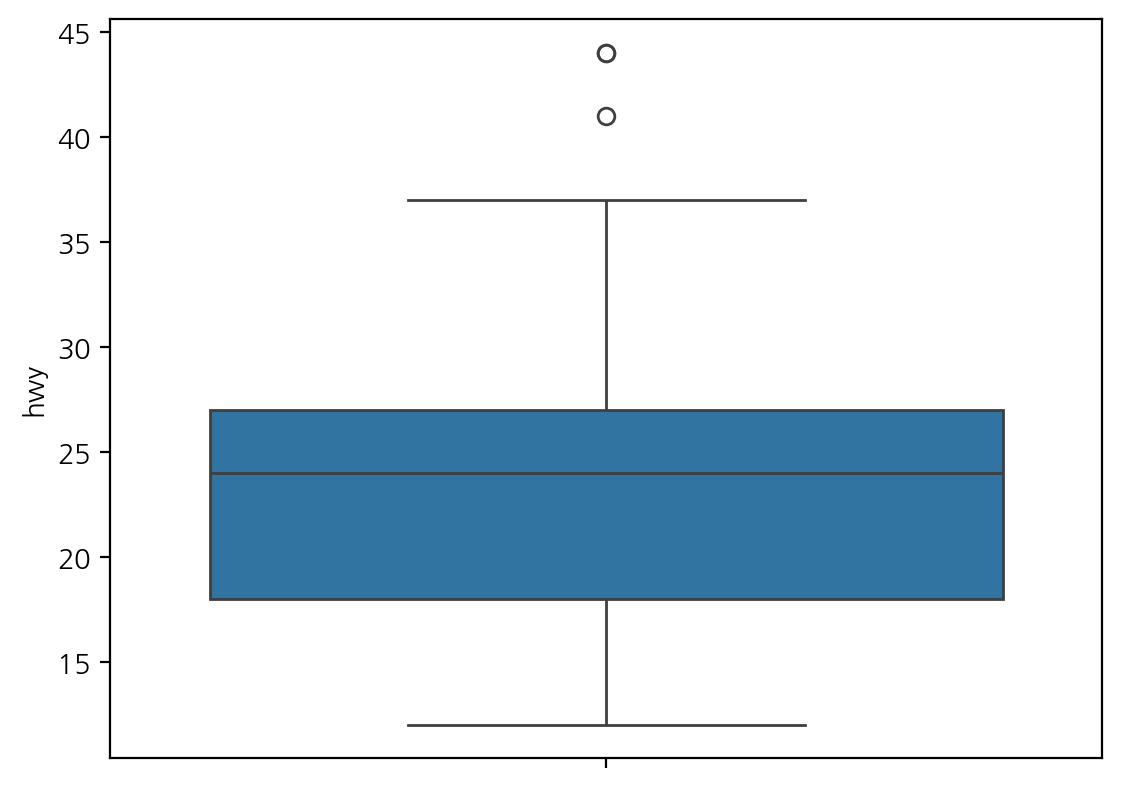

In [104]:
import seaborn as sns
sns.boxplot(mpg, y = 'hwy')

In [112]:
s1 = pd.Series([1,2,3,4,5])

In [113]:
s1.quantile(.50)

3.0

In [117]:
s1.quantile([.24, .50, .75])

0.24    1.96
0.50    3.00
0.75    4.00
dtype: float64

In [115]:
s2 = pd.Series([1,2,4,5])

In [118]:
s2.quantile([.25, .50, .75])

0.25    1.75
0.50    3.00
0.75    4.25
dtype: float64

In [126]:
pct25 = mpg['hwy'].quantile(.25)
pct25

18.0

In [127]:
pct75 = mpg['hwy'].quantile(.75)
pct75

27.0

In [128]:
iqr = pct75 - pct25
iqr

9.0

In [129]:
pct25 - 1.5 * iqr  # 하한

4.5

In [130]:
pct75 + 1.5 * iqr  # 상한

40.5

In [131]:
mpg['hwy'].describe()

count    234.00
mean      23.44
std        5.95
min       12.00
25%       18.00
50%       24.00
75%       27.00
max       44.00
Name: hwy, dtype: float64

In [132]:
mpg['hwy'].describe()['25%']

18.0

In [133]:
dmpg = mpg.dropna(subset = ['hwy'])
len(dmpg)

234

In [134]:
len(mpg)

234

### 3. 극단치를 결측 처라히기

In [140]:
import pandas as pd
mpg = pd.read_csv("data/mpg.csv")

In [141]:
# 4.5 ~ 40.5 벗어나면 NaN 부여
mpg['hwy'] = np.where((mpg['hwy'] < 4.5) | (mpg['hwy'] > 40.5), np.nan, mpg['hwy'])

# 결측치 빈도 확인
mpg['hwy'].isna().sum()

3

In [144]:
mpg.dropna(subset = ['hwy']).groupby('drv').agg(mean_hwy = ('hwy', 'mean'))

,mean_hwy
drv,
4,19.17
f,27.73
r,21.00


In [145]:
mpg.groupby('drv').agg(mean_hwy = ('hwy', 'mean'))

,mean_hwy
drv,
4,19.17
f,27.73
r,21.00


## 정리하기

In [146]:
## 1. 결측치 정제하기
df = pd.DataFrame({'sex'   : [1, 2, 1, 3, 2, 1],
                   'score' : [5, 4, 3, 4, 2, 6]})
pd.isna(df).sum()                                 # 결측치 확인
df_nomiss = df.dropna(subset = ['score'])         # 결측치 제거
df_nomiss = df.dropna(subset = ['score', 'sex'])  # 여러 변수 동시에 결측치 제거


## 2. 이상치 정제하기

# 이상치 확인
df['sex'].value_counts(sort = False)

# 이상치 결측 처리
df['sex'] = np.where(df['sex'] == 3, np.nan, df['sex'])

# 상자 그림으로 극단치 기준값 찾기
pct25 = mpg['hwy'].quantile(.25)  # 1사분위수
pct75 = mpg['hwy'].quantile(.75)  # 3사분위수
iqr = pct75 - pct25               # IQR
pct25 - 1.5 * iqr                 # 하한
pct75 + 1.5 * iqr                 # 상한

# 극단치 결측 처리
mpg['hwy'] = np.where((mpg['hwy'] < 4.5) | (mpg['hwy'] > 40.5), np.nan, mpg['hwy'])